## TESS/ZTF & Pandas Example Notebook

#### Setup

In [1]:
import sys

setupFlag = False ## Set flag to True if these aren't installed
if setupFlag:
    !{sys.executable} -m pip install astroquery
    ## https://github.com/astropy/astroquery
    !{sys.executable} -m pip install eleanor
    ## https://github.com/afeinstein20/eleanor
    !{sys.executable} -m pip install lightkurve
    ## https://github.com/KeplerGO/lightkurve
    !{sys.executable} -m pip install sncosmo

In [18]:
from useful_functions import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

savePNG = True ## Changes matplotlib backend to save plots as pgf (default:True)
if savePNG:
    mpl.use("agg")
    plotExt = str('.png')
elif not savePNG:
    mpl.use("pgf")
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,})
    plotExt = str('.pgf')

notebookPlotFlag = True ## Changes Jupyter plotting backend (default:True)
if notebookPlotFlag:
    %matplotlib notebook
elif not notebookPlotFlag:
    %matplotlib inline

### Importing .csv files to Pandas

I saved the data in such a way that they could easily be imported in again, but usually one has to manually specify column names or account for formatting issues in some way

In [19]:
tess_data = pd.read_csv('TESS_SN2020bpi.csv')
ztf_data = pd.read_csv('ztf_SN2020bpi.csv')

DataFrames can be displayed by using $\texttt{display()}$ or $\texttt{print()}$; I personally prefer using the former since Jupyter Notebook renders it in a much more readable way. Default behavior is to hide most of the rows, but this can be changed by setting a Pandas option for it

In [20]:
display(tess_data)
display(ztf_data)

,BTJD,mjd,cts,e_cts,bkg_model,raw_flux,e_flux,bkg_model_flux,corr_flux
0,1870.44408,58869.94408,-5339.0302,1368.8706,1502.1435,-0.030663,0.007862,0.008627,0.002060
1,1870.44408,58869.94408,-5334.2775,1367.3354,1502.1435,-0.030636,0.007853,0.008627,0.002085
2,1870.46491,58869.96491,-6841.1413,1375.3282,1502.1435,-0.039290,0.007899,0.008627,-0.006033
3,1870.46491,58869.96491,-6820.1378,1373.8129,1502.1435,-0.039169,0.007890,0.008627,-0.005920
4,1870.48574,58869.98574,-2219.7583,1400.7610,1501.2344,-0.012748,0.008045,0.008622,0.018870
...,...,...,...,...,...,...,...,...,...
4809,1926.42209,58925.92209,-4792.2643,1094.2836,-1019.9026,-0.027523,0.006285,-0.005857,0.041663
4810,1926.44293,58925.94293,-5526.9100,1078.8450,-1019.9026,-0.031742,0.006196,-0.005857,0.039333
4811,1926.44293,58925.94293,-5513.5562,1078.6698,-971.0911,-0.031665,0.006195,-0.005577,0.039494
4812,1926.46376,58925.96376,513.3751,1099.4535,-971.0911,0.002948,0.006314,-0.005577,0.058604


,BTJD,mjd,magap,sig_magap,flux
0,1879.870567,58879.370567,19.729799,0.2218,0.014224
1,1881.011065,58880.511065,19.959801,0.2436,0.011509
2,1881.031343,58880.531343,19.473101,0.1538,0.018018
3,1881.843854,58881.343854,19.660400,0.2291,0.015163
4,1882.032546,58881.532546,19.363001,0.1425,0.019941
...,...,...,...,...,...
60,1913.956053,58913.456053,18.190201,0.0653,0.058730
61,1914.886007,58914.386007,18.257299,0.0857,0.055210
62,1914.914143,58914.414143,18.423201,0.0892,0.047387
63,1915.890868,58915.390868,18.187401,0.0936,0.058882


I personally just use a function I have inside $\texttt{useful_functions.py}$ that can display DataFrames side by side (assuming there's enough horizontal space); it will also always print all rows for a DataFrame.

In [5]:
display_side_by_side(tess_data, ztf_data)

,BTJD,mjd,cts,e_cts,bkg_model,raw_flux,e_flux,bkg_model_flux,corr_flux
0,1870.44408,58869.94408,-5339.0302,1368.8706,1502.1435,-0.030663,0.007862,0.008627,0.002060
1,1870.44408,58869.94408,-5334.2775,1367.3354,1502.1435,-0.030636,0.007853,0.008627,0.002085
2,1870.46491,58869.96491,-6841.1413,1375.3282,1502.1435,-0.039290,0.007899,0.008627,-0.006033
3,1870.46491,58869.96491,-6820.1378,1373.8129,1502.1435,-0.039169,0.007890,0.008627,-0.005920
4,1870.48574,58869.98574,-2219.7583,1400.7610,1501.2344,-0.012748,0.008045,0.008622,0.018870
5,1870.48574,58869.98574,-2215.3328,1399.2683,1501.2344,-0.012723,0.008036,0.008622,0.018894
6,1870.50658,58870.00658,-10843.6913,1370.6601,1501.2344,-0.062277,0.007872,0.008622,-0.027591
7,1870.50658,58870.00658,-10820.4197,1369.1692,1501.2344,-0.062144,0.007863,0.008622,-0.027466
8,1870.52741,58870.02741,-9069.4821,1365.9754,1501.2344,-0.052088,0.007845,0.008622,-0.018032
9,1870.52741,58870.02741,-9055.7911,1364.5169,1501.2344,-0.052009,0.007837,0.008622,-0.017959


These are explanations of the columns are both data sets:

###### tess_data: 
(Note: this data still includes both of the targets Michael found, so data may need to be split)

- BTJD: Julian day minus 2457000.0, corrected to the arrival times at the barycenter of the Solar System. Original time format for TESS data from Michael.

- mjd: Modified Julian day. I used astropy to convert to mjd from the original BTJD data

- cts: image subtracted electron counts. Original data from Michael.

- e_cts: Error for counts. Original data from Michael.

- bkg_model: model of additional electron counts to subtract from data. Original data from Michael.

- raw_flux: Uncorrected flux converted from the original electron counts. When calculating the flux, I took the original counts and used the following equation: $\text{flux} = \text{cts} \ /  \ \text{Interval} \ / \ \text{Area}$. I took the interval to be $\sim$2010 seconds basked on the average time interval between data points in the set and I took the area to be $\sim 86.6 \ \text{cm}^2$.

- e_flux: error of flux converted from the original error in electron counts using the same method as above. (Note: As of 10/31/20, this represents the error of the uncorrected flux, this is not multiplied by the scale factors used for the correction of the flux, I will add this soon)

- bkg_model_flux: flux of the background model converted using same method as above.

- corr_flux: result of scaling and shifting the raw_flux of tess to most closely match the ztf flux. As of 10/31/20, the corr_flux included is a model that has seperate scale/shift factors for sector 21 and sector 22 data and also adds or subtracts a fraction of the bkg_model_flux for each sector; takes the form $\text{corr_flux} = (\text{Scale_Const} \times \text{raw_flux} + \text{Vertical_Shift}) - (\text{bkg_model_Fraction} \times \text{bkg_model_flux})$ (Note: As of 10/31/20, the fitting does not take into account e_cts. I was having issues with the least squares function and values apparently not being finite, looking into how to fix this)
    - Sector 21 Best Fit:
        - Scale Factor: 0.9381
        - Vertical Shift: 0.0404
        - bkg_model_flux Fraction: 1.1078
    - Sector 22 Best Fit:
        - Scale Factor: 0.5521
        - Vertical Shift: 0.0593
        - bkg_model_flux Fraction: -0.4213 (so $\sim$ 42% of the bkg_model_flux is actually being *added* back to the data)

    (Note: I realize these are values greater than I had shown before; I noticed while working on this that I hadn't accounted for the doubled data when finding the interval to calculate the flux, so the flux values are now changed by a factor of two)
    
###### ztf_data: 
(Note: This is data solely from the ztf r-band, and I've only included data that falls within the time range observed by TESS)

- BTJD: Same as above. Original data used mjd, I converted it to BTJD with astropy for cases where it was more convenient, but I've mostly used mjd recently

- mjd: Sme as above. Original data from ztf

- magap: AP Magnitude. Original data from ztf

- sig_magap: I believe this is the error for the magnitude? Original data from ztf.

- flux: Found by converting magap using sncosmo and the built in ztf_r bandpass.
- ~~ sig_flux: Found by converting sig_magap using sncosmo and the built in ztf_r bandpass. ~~

### Plotting

There's two ways that I know of to plot Pandas dataframes; I usually find it more convenient to use the built in method, but there are some limitations to it. One can also plot individual Series from a DataFrame like any series or array with matplotlib.

##### Option 1: Matplotlib

Calling a DataFrame with the string name of the desired column in brackets (eg DataFrame["column_name"]) will return a Pandas Series, which matplotlib will handle like a Numpy array or series when plotting.

<IPython.core.display.Javascript object>


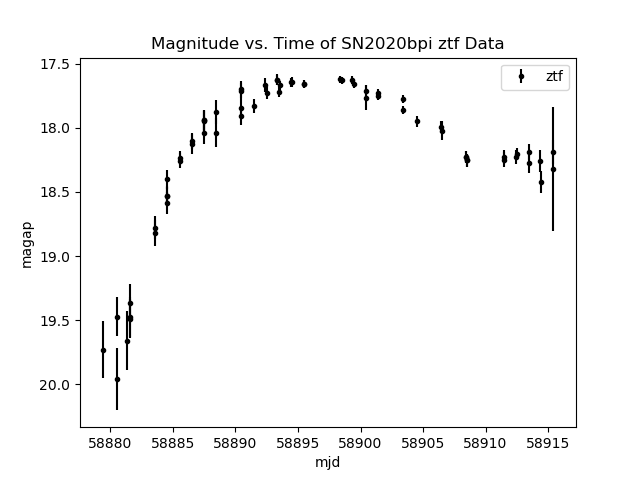

In [53]:
ztf_mjd = ztf_data['mjd']
ztf_magap = ztf_data['magap']
ztf_sig_magap = ztf_data['sig_magap']


fig, ax = plt.subplots(1,1)
ax.errorbar(x=ztf_mjd, y=ztf_magap, yerr=ztf_sig_magap, fmt='.k', label='ztf')
ax.set_xlabel('mjd')
ax.set_ylabel('magap')
ax.set_title('Magnitude vs. Time of SN2020bpi ztf Data')
ax.set_ylim(ax.get_ylim()[::-1])
ax.legend()
fig.show();

<IPython.core.display.Javascript object>


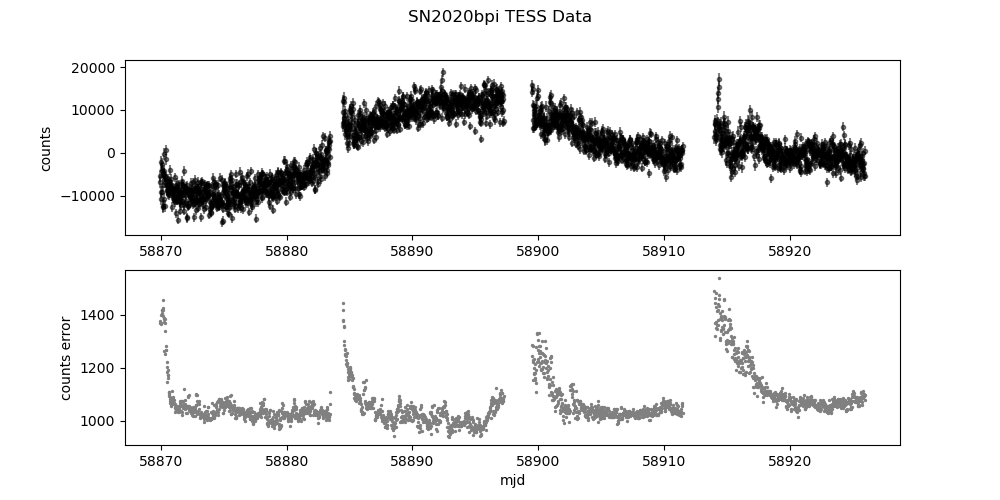

In [56]:
tess_mjd = tess_data['mjd'][::2]
tess_cts = tess_data['cts'][::2]
tess_e_cts = tess_data['e_cts'][::2]

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,5))

ax1.errorbar(tess_mjd,tess_cts,yerr=tess_e_cts,fmt='.k',alpha=0.5)
ax1.set_ylabel('counts')
ax2.scatter(tess_mjd,tess_e_cts,s=2,color='gray')
ax2.set_xlabel('mjd')
ax2.set_ylabel('counts error')
fig.suptitle('SN2020bpi TESS Data')
fig.show();

##### Option 2: Built in Method

Pandas has a built in method for using matplotlib with [DataFrame.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot). While most options for matplotlib can be passed along, there's a few specific differences. One includes the names of the columns to plot as strings rather than the series or arrays themselves.

<IPython.core.display.Javascript object>


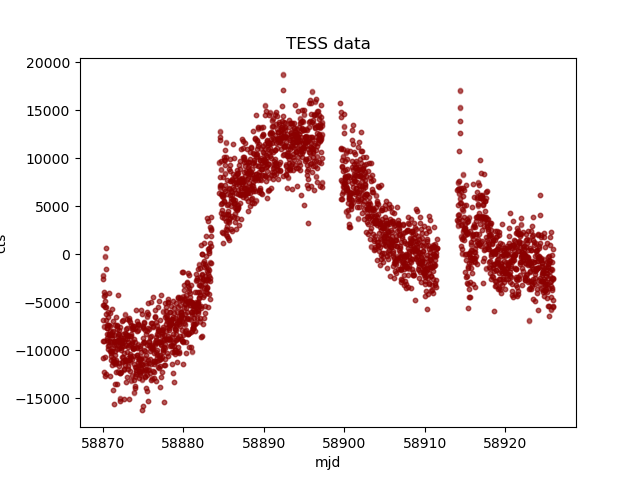

<AxesSubplot:title={'center':'TESS data'}, xlabel='mjd', ylabel='cts'>

In [139]:
tess_data.plot('mjd','cts',kind='scatter',color='darkred',s=10,alpha=0.4,title='TESS data')

Multiple data sets can be plotted together by setting one instance of DataFrame.plot() as the axis and passing it as an argument for other data sets being plotted. 

<IPython.core.display.Javascript object>


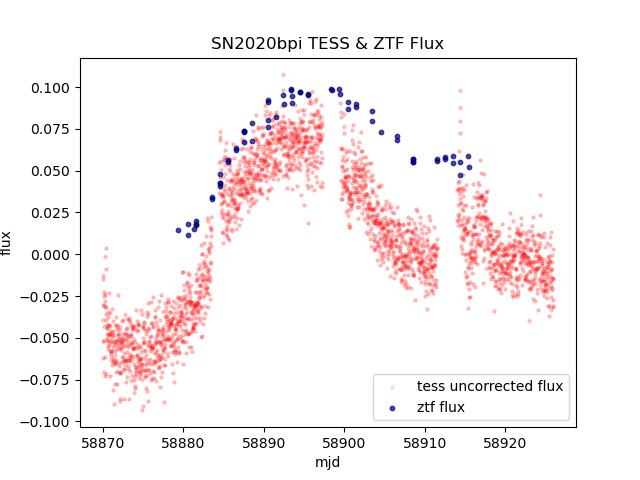

<IPython.core.display.Javascript object>


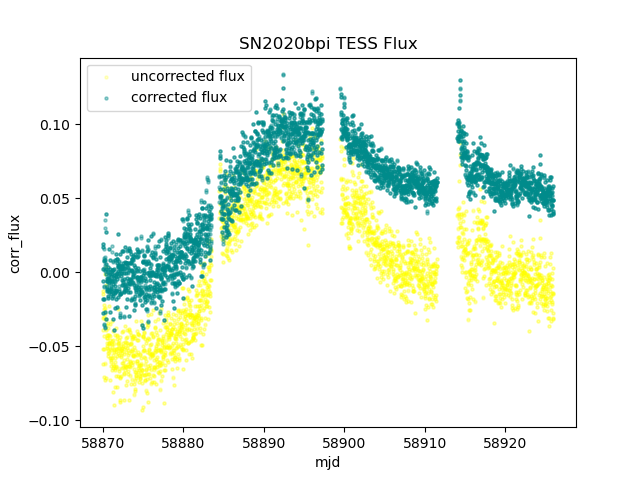

<AxesSubplot:title={'center':'SN2020bpi TESS Flux'}, xlabel='mjd', ylabel='corr_flux'>

In [130]:
ax1 = tess_data.plot('mjd','raw_flux',kind='scatter',color='red',s=5,alpha=0.1,
                     label='tess uncorrected flux', title='SN2020bpi TESS & ZTF Flux')
ztf_data.plot('mjd','flux',kind='scatter',color='navy',s=10,alpha=0.7,label='ztf flux',ax=ax1)

ax2 = tess_data.plot('mjd','raw_flux',kind='scatter',color='yellow',s=5,alpha=0.2,
                     label='uncorrected flux',title='SN2020bpi TESS Flux Correction')
tess_data.plot('mjd','corr_flux',kind='scatter',color='darkcyan',s=5,alpha=0.4,label='corrected flux',ax=ax2)

##### Combining Methods

Pandas automatically handles enough of the formatting to create a basic plot, but one can use matplotlib commands in conjunction with the Pandas plotting method to create more tailored plots:

<IPython.core.display.Javascript object>


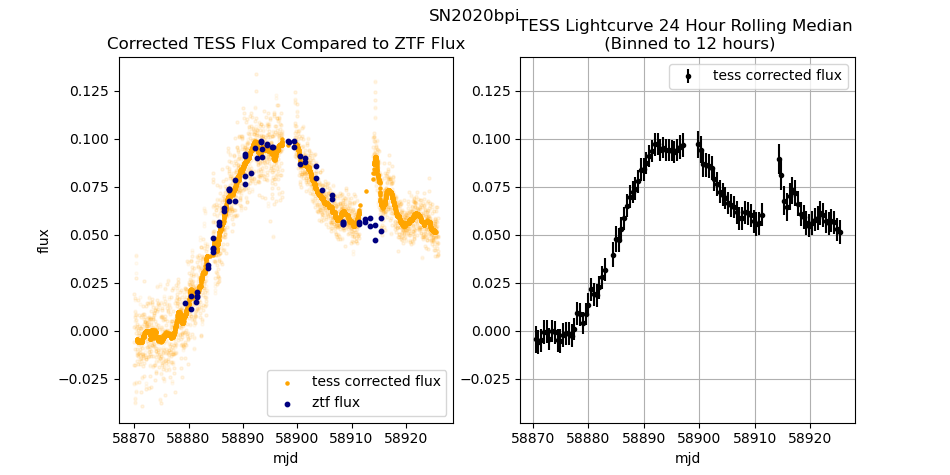

In [143]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(9.5,4.75))
tess_data.plot('mjd','corr_flux',kind='scatter',color='orange',s=5,alpha=0.05,ax=ax1)
ax1.scatter(tess_data['mjd'][::2].rolling(48).median(), tess_data['corr_flux'][::2].rolling(48).median(),
            s=5,label='tess corrected flux',color='orange')
ztf_data.plot('mjd','flux',kind='scatter',s=10,color='navy', label='ztf flux',ax=ax1)

ax2.errorbar(tess_data['mjd'][::2].rolling(48).median()[::24], tess_data['corr_flux'][::2].rolling(48).median()[::24],
             yerr=tess_data['e_flux'][::2].rolling(48).median()[::24],color='orange',fmt='.k',alpha=1,
             label='tess corrected flux') 
            ## I realize the rolling median of the error may not be entirely rigourous, 
            ## just using it for illustrative purposes.


ax1.set_xlabel('mjd')
ax1.set_ylabel('flux')
ax1.legend()
ax1.set_title('Corrected TESS Flux Compared to ZTF Flux')

ax2.set_ylim(ax1.get_ylim())
ax2.set_xlabel('mjd')
ax2.legend()
ax2.set_title('TESS Lightcurve 24 Hour Rolling Median \n (Binned to 12 hours)')
ax2.grid()

fig.suptitle('SN2020bpi')
fig.show();